In [458]:
import pandas as pd
import sys
from matplotlib import pyplot as plt
import numpy as np

# Q 1

In [459]:
def load_data(filename):
    with open(filename, 'r') as f:
        reader = pd.read_csv(f)
    return reader

In [460]:
data = load_data("toy.csv")
data

,year,days
0,1800,120
1,1801,155
2,1802,99


# Q 2

In [476]:
def visualize(data):
    plt.plot(data.year, data.days)
    plt.xticks([t for t in data.year])
    plt.xlabel("Year")
    plt.ylabel("Number of Frozen Days")
    plt.savefig("plot.jpg") # must be plot.jpg

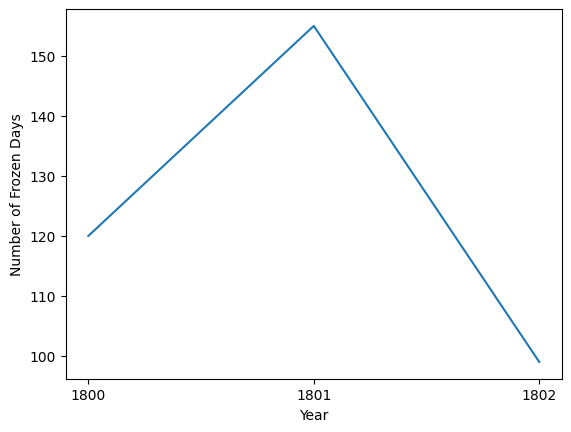

In [477]:
# sys.argv[1] # the first argument as string
visualize(data)

# Q 3

### Q 3-(a)

In [ ]:
def q3a(data):
    #make X as an array
    X = []
    #x <- year of the dataset
    for i in data.year:
        #transpose all the data and append in X
        transpose = np.transpose([1,i])
        X.append(transpose)
    #reshape it to dimension n × 2 ([1,xi])
    X = np.reshape(X, (len(X), 2))
    #make sure data type is int64
    X = np.array(X).astype("int64")
    return X

In [ ]:
# def q3a(data):
#     #make X as an array
#     X = []
#     #x <- year of the dataset
#     for i in data.year:
#         #transpose all the data and append in X
#         X.append([np.transpose(1),np.transpose(i)])
#     #reshape it to dimension n × 2 ([1,xi])
#     X = np.reshape(X, (len(X), 2))
#     #make sure data type is int64
#     X = np.array(X).astype("int64")
#     return X

In [ ]:
X = q3a(data)
X

array([[   1, 1800],
       [   1, 1801],
       [   1, 1802]])

### Q 3-(b)

In [ ]:
def q3b(data):
    #make Y as an array
    Y = []
    for i in data.days:
        #append all the days in Y
        Y.append(i)
    #make sure data type is int64
    Y = np.array(Y).astype("int64")
    return Y

In [ ]:
Y = q3b(data)
Y

array([120, 155,  99])

### Q 3-(c)

In [ ]:
def q3c(X):
    #Z = X^T * X
    Z = np.transpose(X).dot(X)
    Z = np.array(Z).astype("int64")
    return Z

In [ ]:
Z = q3c(X)
print(Z)

[[      3    5403]
 [   5403 9730805]]


### Q 3-(d)

In [ ]:
def q3d(X):
    #inverse the data of Z
    I = np.linalg.inv(q3c(X))
    return I


In [ ]:
I = q3d(X)
I

array([[ 1.62180083e+06, -9.00500000e+02],
       [-9.00500000e+02,  5.00000000e-01]])

### Q 3-(e)

In [ ]:
def q3e(X): 
    #PI = (X^T * X)^(-1) * X^T
    PI = q3d(X).dot(np.transpose(X))
    return PI

In [ ]:
PI = q3e(X)
PI

array([[ 9.00833334e+02,  3.33333333e-01, -9.00166667e+02],
       [-5.00000000e-01, -1.73194792e-13,  5.00000000e-01]])

### Q 3-(f)

In [ ]:
def q3f(X, Y):
    #β = (X^T * X)^(-1) * X^T * Y
    b = q3e(X).dot(Y)
    return b

In [ ]:
b = q3f(X, Y)
b

array([ 1.90351667e+04, -1.05000000e+01])

# Q 4

In [ ]:
def prediction(b):
    testY = b[0] + b[1] * 2022
    return testY

In [ ]:
testY = prediction(b)
testY

-2195.833334687977

# Q 5

In [ ]:
def interpretation(b):
    #if b1 = 0 -> =
    if b[1] == 0:
        return '='
    #if b[1] > 0 -> >
    elif b[1] > 0:
        return '>'
    #if b[1] < 0 -> <
    elif b[1] < 0:
        return '<'

In [ ]:
interpretation = interpretation(b)
interpretation

'<'

# Q 6

In [ ]:
def limitation(b):
    #0 = b0 +b1 * x(noFreeze)
    #-bo = b1 * x(noFreeze)
    #-(bo / b1) = x(noFreeze)
    noFreeze = -(b[0]/b[1])
    return noFreeze

In [ ]:
limitation = limitation()
limitation

2463.0542939079846